# Logistic Regression

## Load Dataset from sklearn

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [7]:
df['class'] = cancer.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


## Pair plot with mean features 

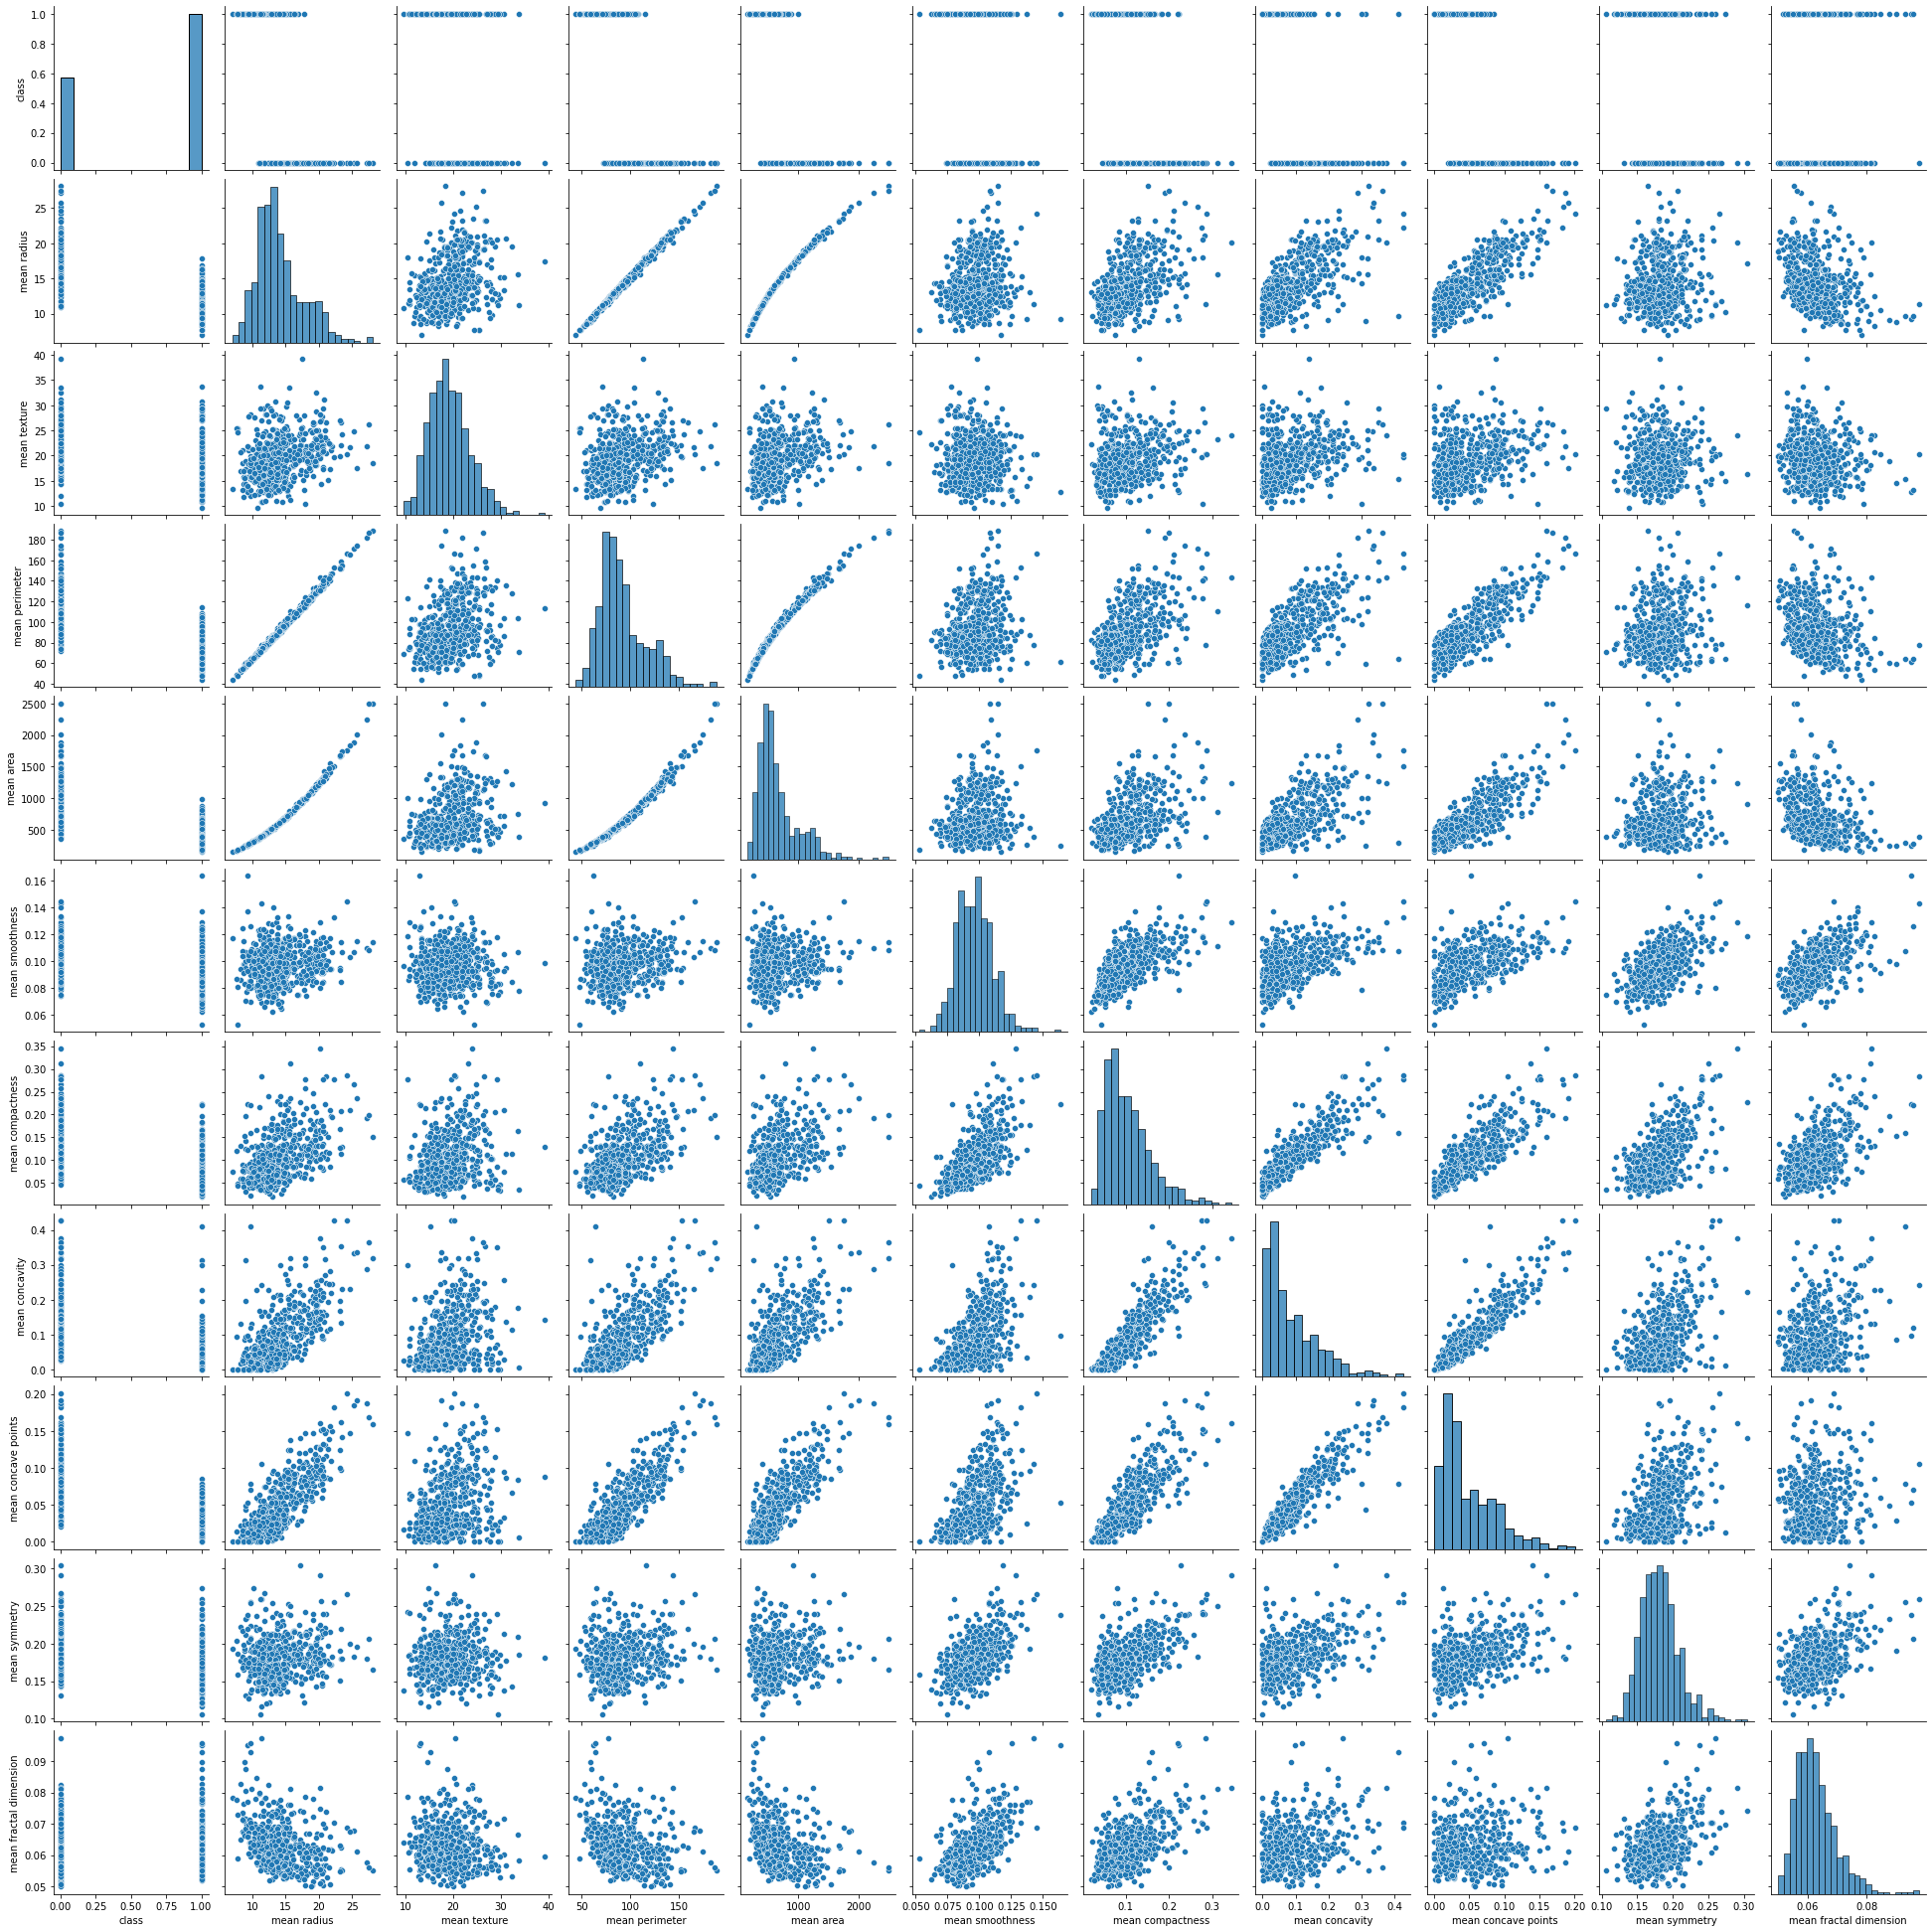

In [8]:
sns.pairplot(df[['class'] + list(df.columns[:10])])
plt.show()

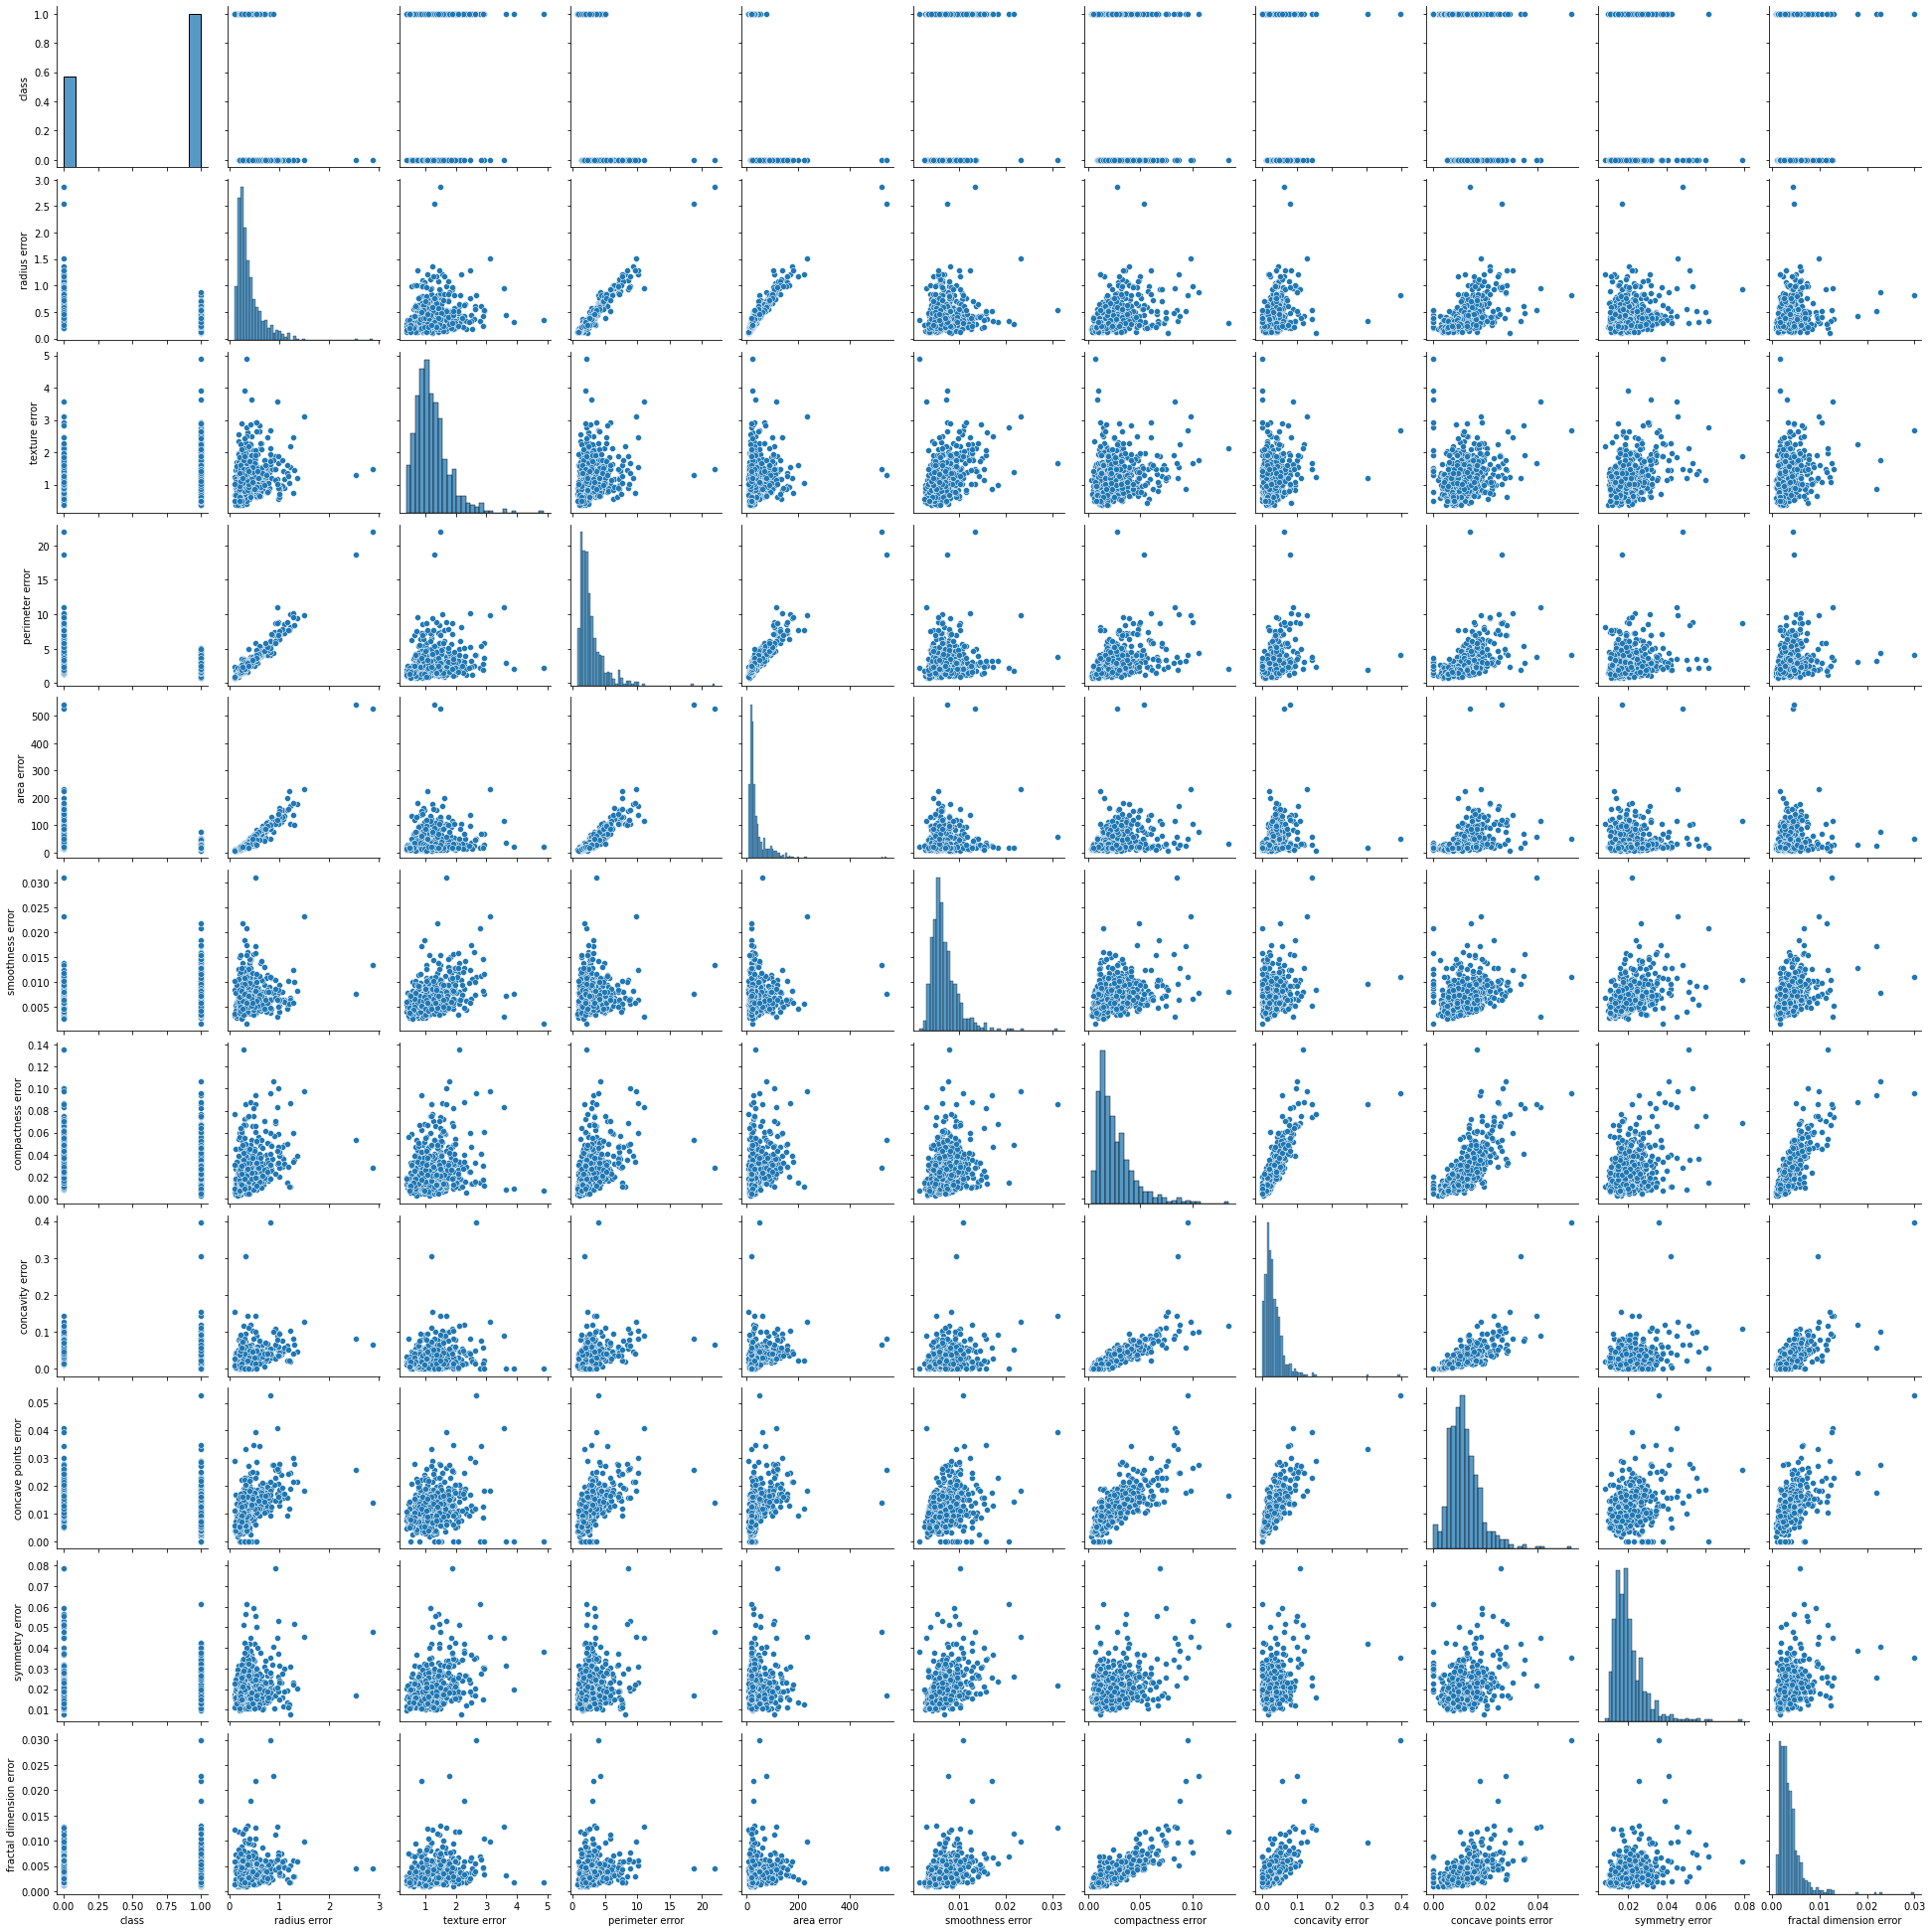

In [9]:
sns.pairplot(df[['class'] + list(df.columns[10:20])])
plt.show()

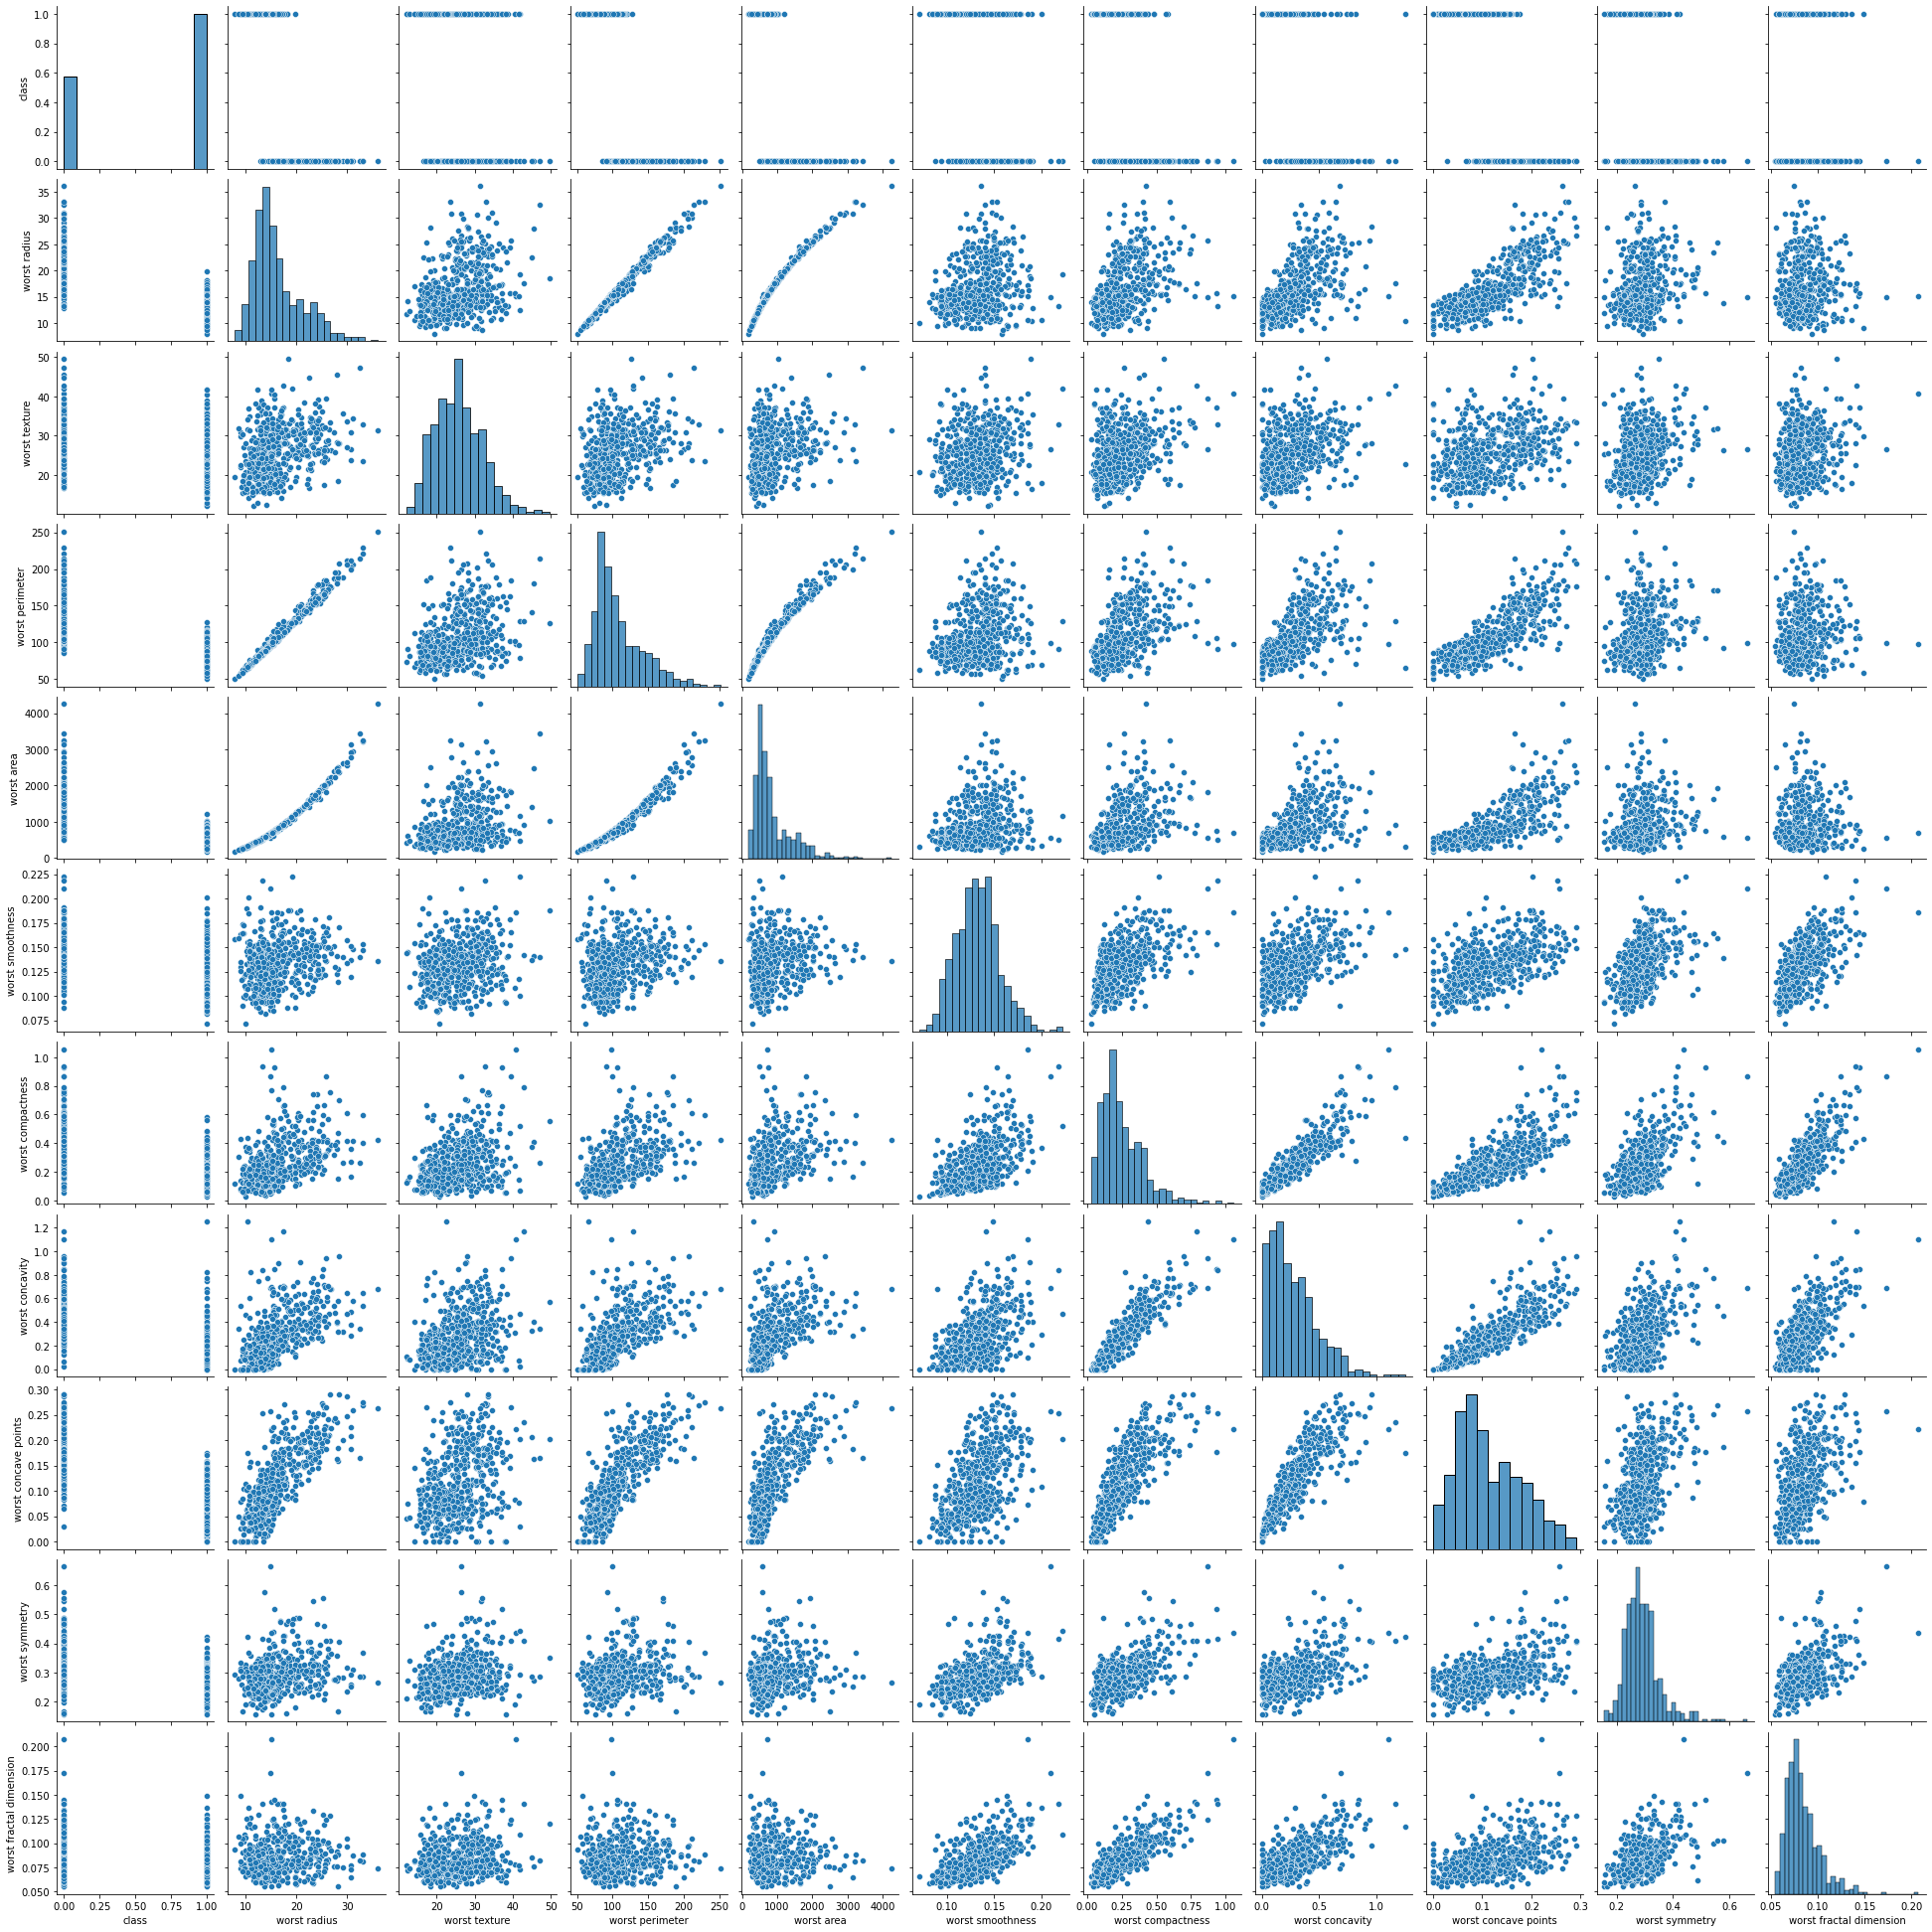

In [10]:
sns.pairplot(df[['class'] + list(df.columns[20:30])])
plt.show()

standard error는 설명변수로 활용하기에 적당하지 않아보임 -> mean, worst만 사용

### Select features 

각 변수별 반응변수의 분포 확인 

In [40]:
cols = list(cancer.feature_names[[0,1,4,5,7,20,21,24,25,27]]) + list(['class'])

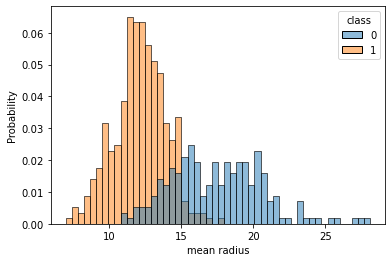

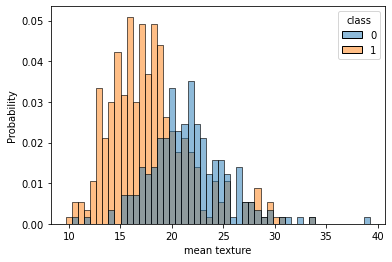

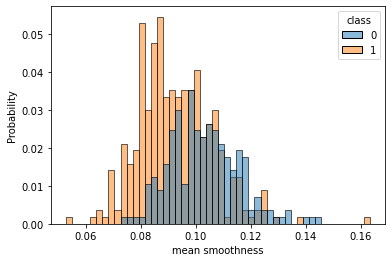

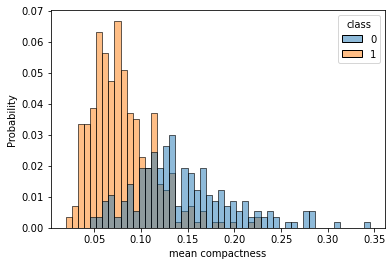

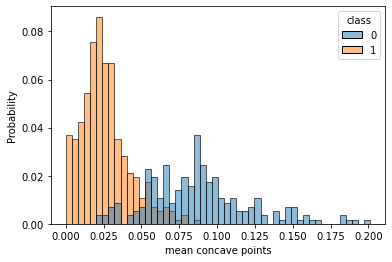

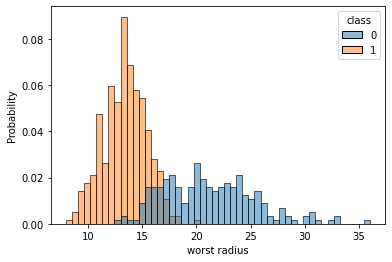

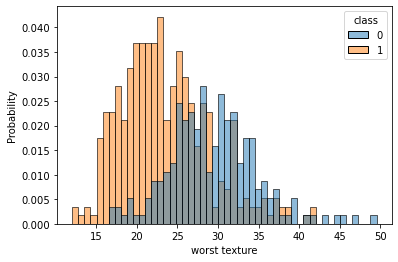

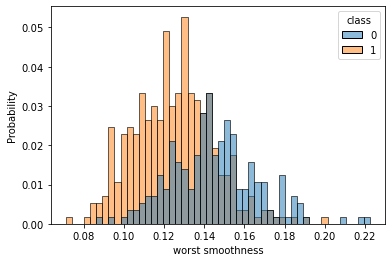

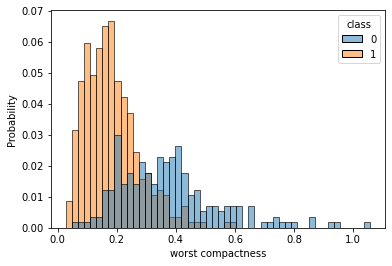

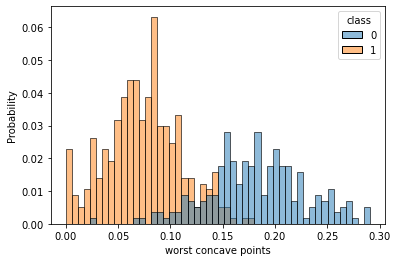

In [41]:
for c in cols[:-1] : 
    sns.histplot(df, x = c, hue = cols[-1], bins = 50, stat = 'probability')
    plt.show()

## Train model with PyTorch

In [42]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim

In [45]:
data = torch.from_numpy(df[cols].values).float()
data.shape

torch.Size([569, 11])

In [46]:
# Split x and y 
x = data[:, :-1]
y = data[:,-1:]
print(x.shape,y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [47]:
# Define configurations 
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [49]:
# Define custom model
class Mymodel(nn.Module) : 
    
    def __init__(self, input_dim, output_dim) : # input_dim, output_dim 정의 
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim) # linear layer 만들기 
        self.act = nn.Sigmoid() # 
        
    def forward(self, x) : 
        # |x| = (batch_size, input_dim)
        y = self.act(self.linear(x))
        # |y| = (batch_size, output_dim)
        
        return y 

In [51]:
model = Mymodel(input_dim = x.size(-1), output_dim = y.size(-1))

crit = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [52]:
for i in range(n_epochs) : 
    y_hat = model(x)
    loss = crit(y_hat, y)  # BCELoss 계산
    
    optimizer.zero_grad() # gradient 초기화
    loss.backward() # gradient descent
    
    optimizer.step() # optimizing 
    
    if( i + 1 ) % print_interval == 0 : 
        print('Epoch %d : loss = %.4e' % (i+1, loss))
    

Epoch 10000 : loss = 2.7201e-01
Epoch 20000 : loss = 2.2551e-01
Epoch 30000 : loss = 1.9758e-01
Epoch 40000 : loss = 1.7924e-01
Epoch 50000 : loss = 1.6637e-01
Epoch 60000 : loss = 1.5685e-01
Epoch 70000 : loss = 1.4954e-01
Epoch 80000 : loss = 1.4373e-01
Epoch 90000 : loss = 1.3901e-01
Epoch 100000 : loss = 1.3509e-01
Epoch 110000 : loss = 1.3178e-01
Epoch 120000 : loss = 1.2895e-01
Epoch 130000 : loss = 1.2649e-01
Epoch 140000 : loss = 1.2434e-01
Epoch 150000 : loss = 1.2244e-01
Epoch 160000 : loss = 1.2074e-01
Epoch 170000 : loss = 1.1922e-01
Epoch 180000 : loss = 1.1785e-01
Epoch 190000 : loss = 1.1661e-01
Epoch 200000 : loss = 1.1547e-01


### Result 

In [56]:
correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print('Accuracy : %.4f' % (correct_cnt/total_cnt))

Accuracy : 0.9649


In [57]:
df = pd.DataFrame(torch.cat([y,y_hat], dim = 1).detach().numpy(),
                  columns = ['y', 'y_hat'])

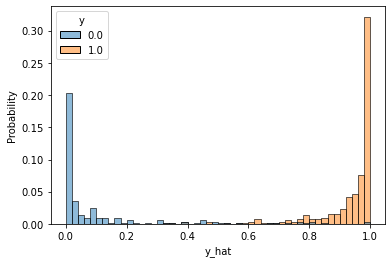

In [59]:
sns.histplot(df, x = 'y_hat', hue = 'y', bins = 50, stat = 'probability')
plt.show()